<a href="https://colab.research.google.com/github/cnyakundi/Independent-Project---Week-14/blob/master/Week14_Carreafour_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research question


As a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.



# Metric of success



Perform your analysis and provide insights gained from your analysis.

Perform dimensionality reduction

Perform feature selection

Perform association analysis

Perform anomality test

 # Dimensionality Reduction

In [1]:
install.packages("data.table")
require(data.table)
# Importing our database

# install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") 
library(tidyverse) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [4]:
# Reading our dataset

data <- read.csv('/content/Supermarket_Dataset_1 - Sales Data.csv')

In [5]:
head(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [6]:
tail(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [7]:
colSums(is.na(data))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [8]:
#checking for duplicates
duplicates <- duplicated(data)
duplicates

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [9]:
# installing more libriries and packages
install.packages('corrplot')
library(corrplot)
library(ggplot2) 
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



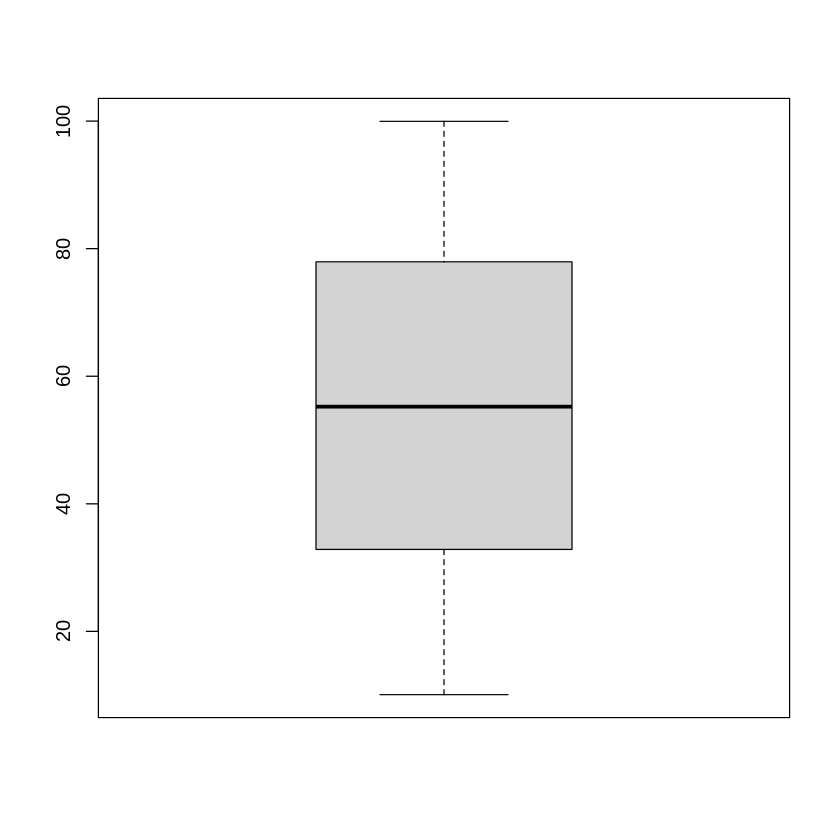

In [10]:
#checking for outliers
#Unit Price
boxplot(data$Unit.price)

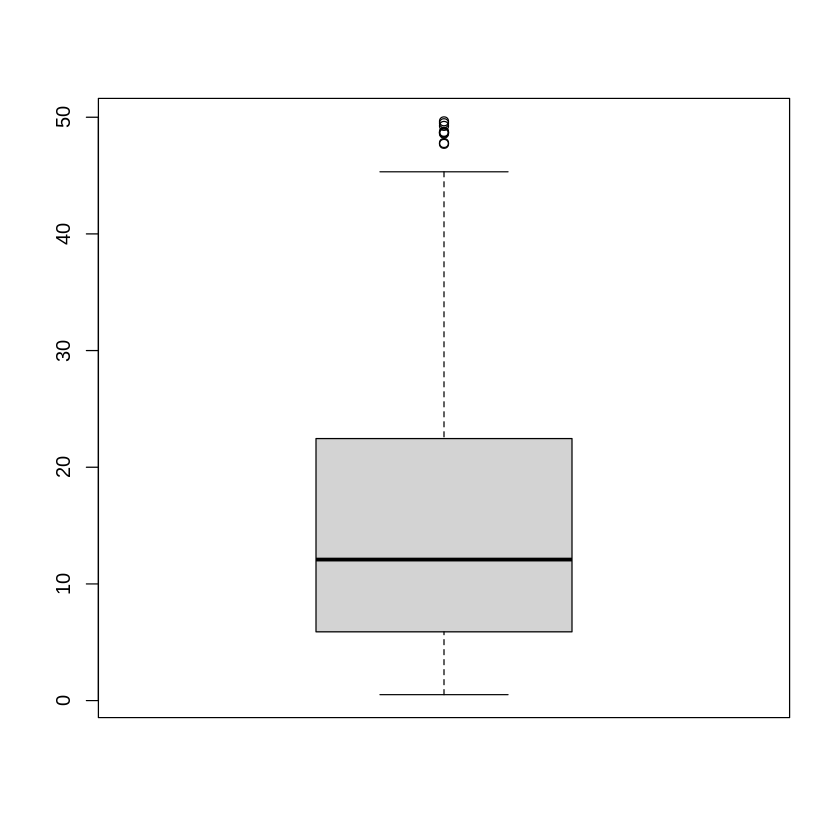

In [11]:
#Tax Column
boxplot(data$Tax)

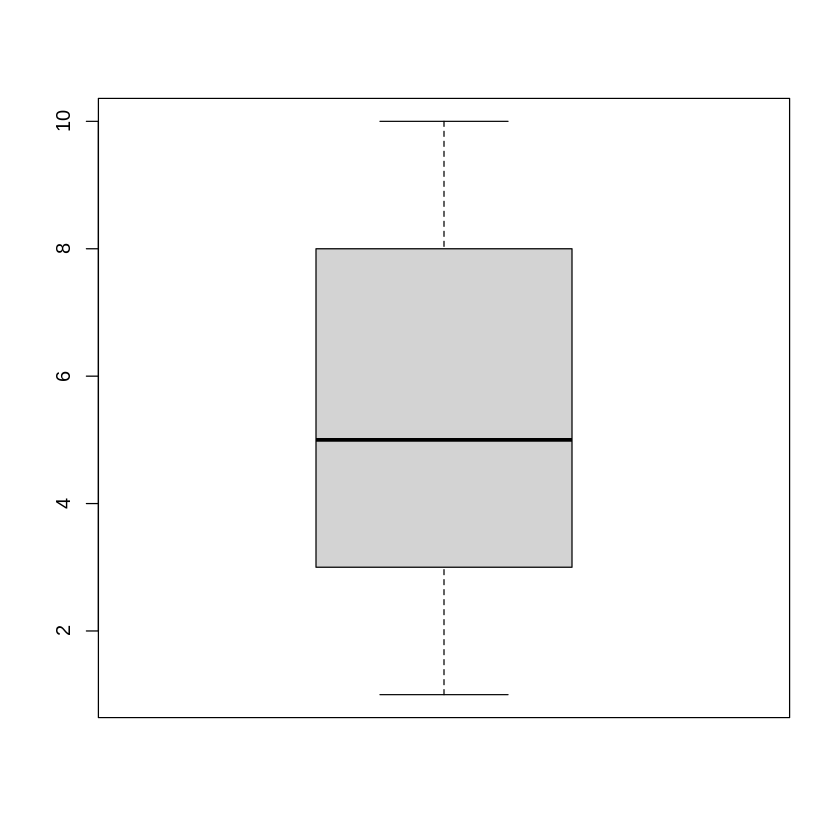

In [12]:
#Quantity Column
boxplot(data$Quantity)

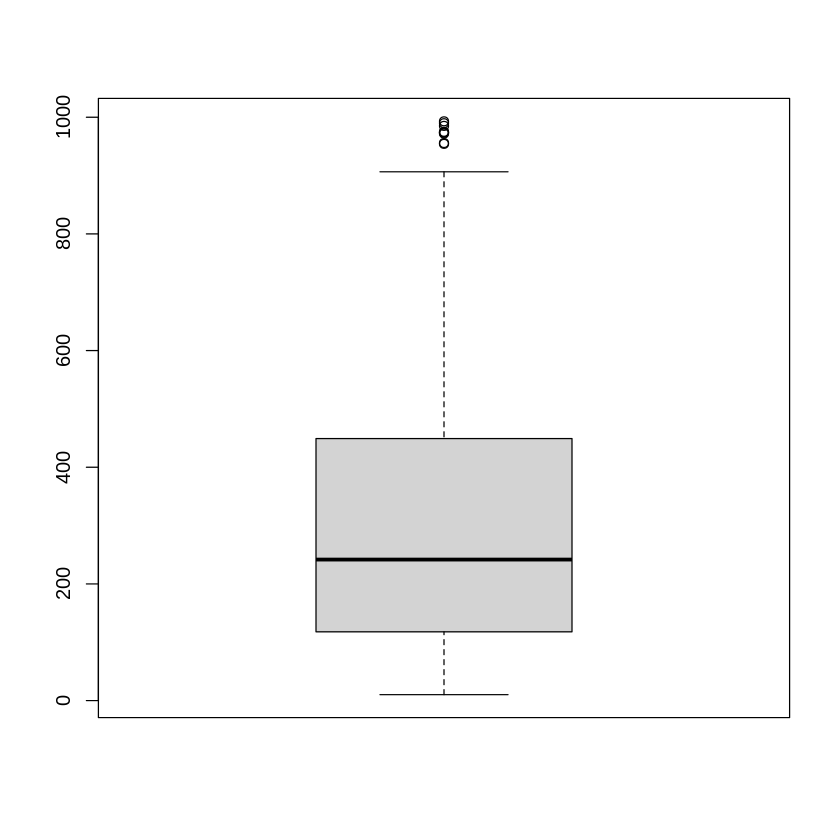

In [13]:
#Cogs Column
boxplot(data$cogs)

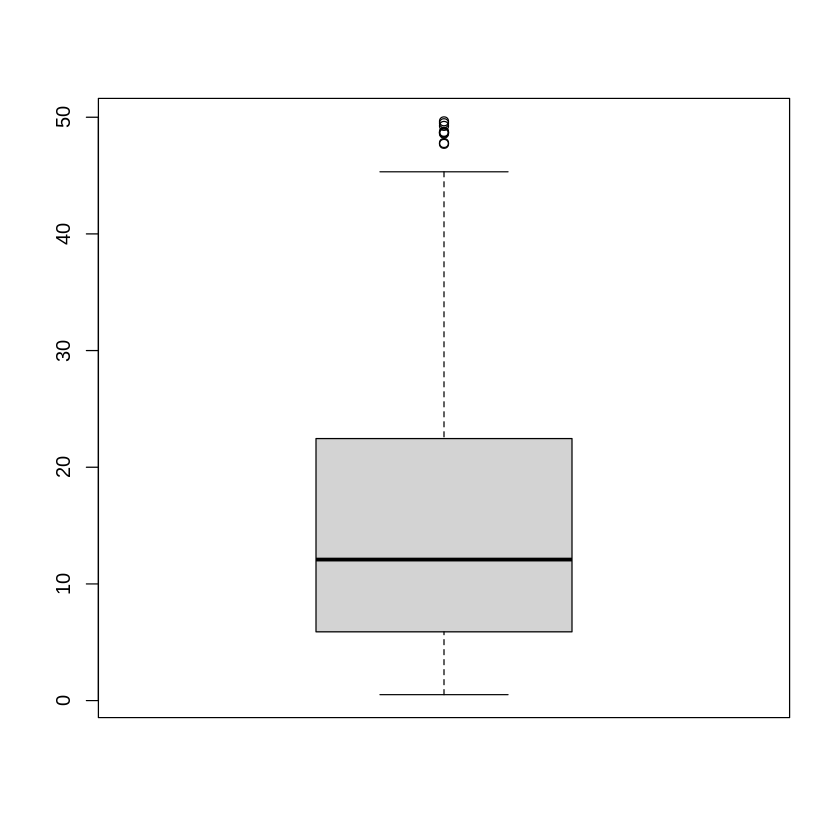

In [14]:
#Gross income Column
boxplot(data$gross.income)

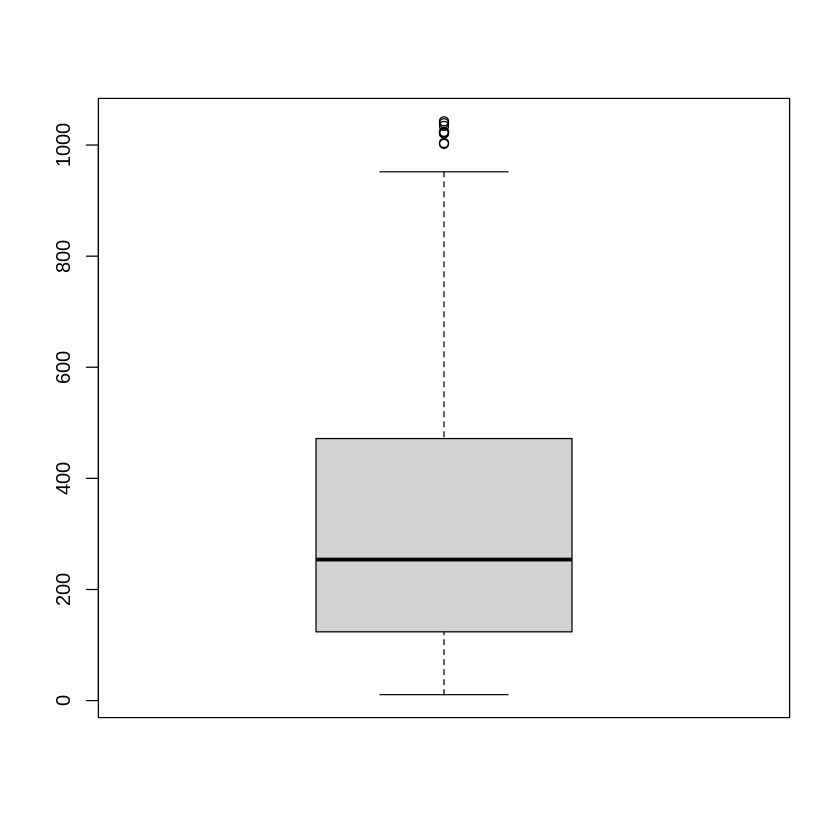

In [15]:
#Total Column
boxplot(data$Total)

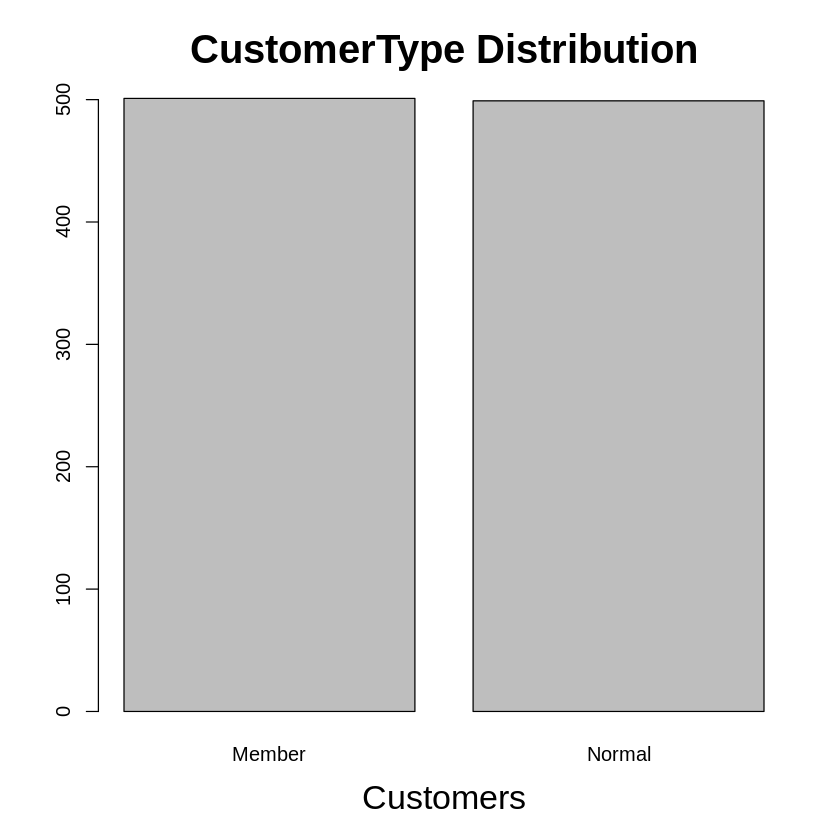

In [16]:
# CustomerType column visualization

customer <- data$Customer.type
customer_freq <- table(customer)
barplot(customer_freq, main = "CustomerType Distribution", xlab = "Customers",cex.main=2, cex.lab=1.7, cex.sub=1.2)

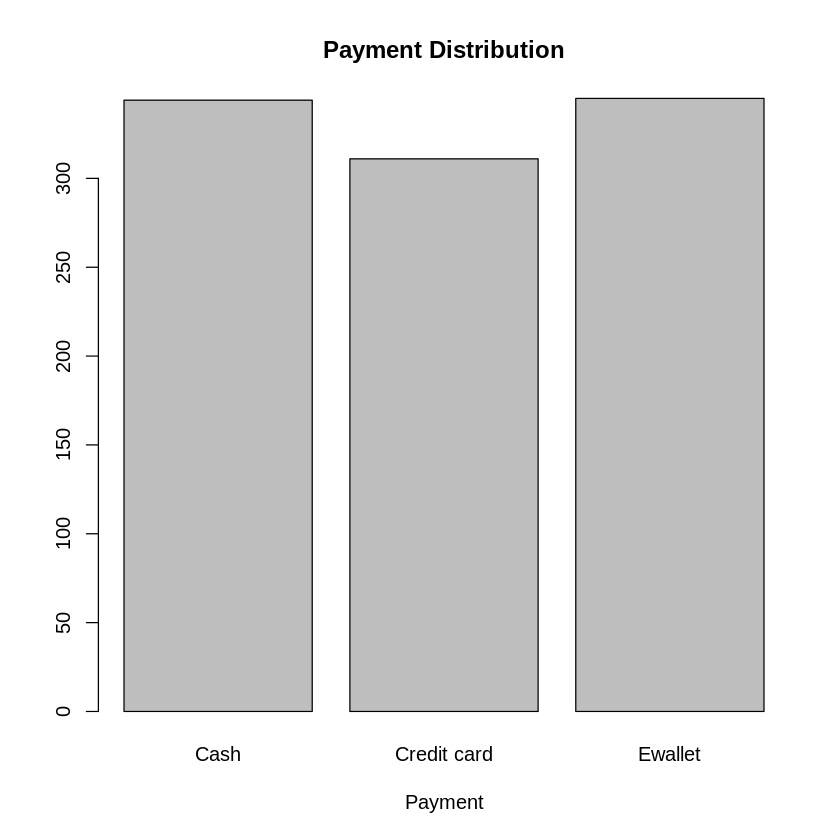

In [17]:
payment <- data$Payment
payment_freq <- table(payment)
barplot(payment_freq, main = "Payment Distribution", xlab = "Payment")

# R t-SNE

In [18]:
# Installing Rtnse package

install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
# Loading our tnse library
 
library(Rtsne)

In [21]:
# Curating the database for analysis 

Labels<-data$Customer.type
data$Customer.type<-as.factor(data$Customer.type)

In [22]:
# For plotting

colors = rainbow(length(unique(data$Customer.type)))
names(colors) = unique(data$Customer.type)

In [23]:
# Executing the algorithm on curated data
 
tsne <- Rtsne(data[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 59.331652 (50 iterations in 0.11 seconds)
Iteration 100: error is 52.516959 (50 iterations in 0.09 seconds)
Iteration 150: error is 51.534116 (50 iterations in 0.09 seconds)
Iteration 200: error is 51.208561 (50 iterations in 0.10 seconds)
Iteration 250: error is 51.095650 (50 iterations in 0.09 seconds)
Iteration 300: error is 0.559395 (50 iterations in 0.09 seconds)
Iteration 350: error is 0.408895 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.377276 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.361206 (50 iterations in 0.09 seconds)
Iteration 500: error is 0.354129 (50 iterations in 0.10 seconds)
Fitting performed in 0.96 seconds.


In [24]:
# Getting the duration of execution

exeTimeTsne <- system.time(Rtsne(data[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 61.584156 (50 iterations in 0.12 seconds)
Iteration 100: error is 53.227342 (50 iterations in 0.10 seconds)
Iteration 150: error is 51.062603 (50 iterations in 0.09 seconds)
Iteration 200: error is 50.423416 (50 iterations in 0.10 seconds)
Iteration 250: error is 50.106237 (50 iterations in 0.10 seconds)
Iteration 300: error is 0.536633 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.380702 (50 iterations in 0.09 seconds)
Iteration 400: error is 0.340534 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.331354 (50 iterations in 0.09 seconds)
Iteration 500: error is 0.322569 (50 iterations in 0.09 seconds)
Fitting performed in 0.97 seconds.


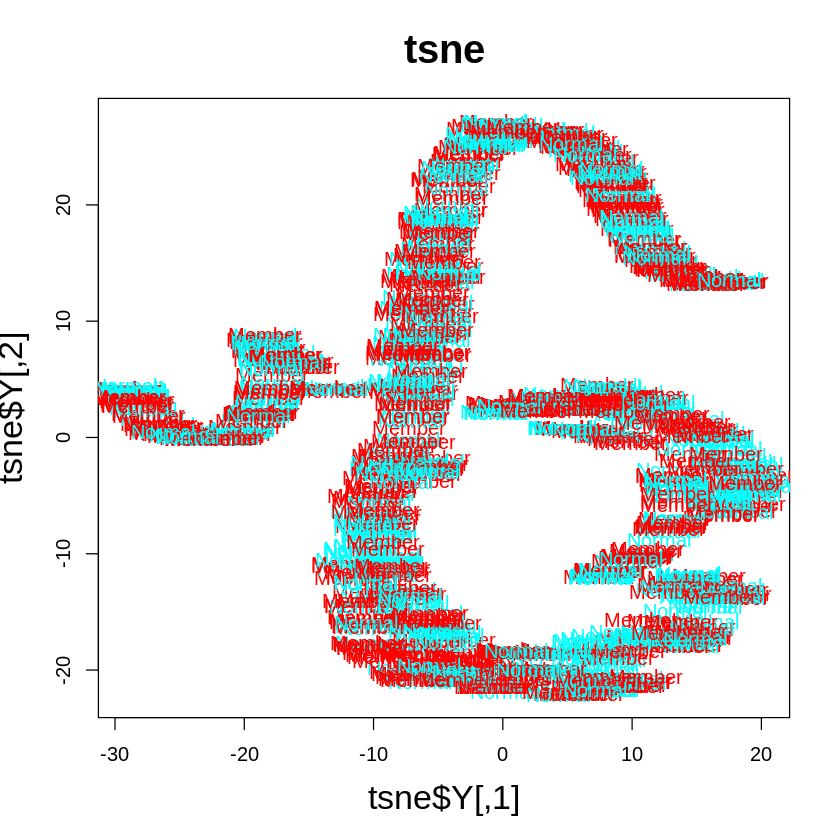

In [25]:
# Plotting our graph and closely examining the graph
 
plot(tsne$Y, t='n', main="tsne",cex.main=2, cex.lab=1.7, cex.sub=1.2)
text(tsne$Y, labels=data$Customer.type, col=colors[data$Customer.type])

# PCA

In [26]:
#Encode the categorical columns to integers
# Product.line column
data$Product.line<-as.integer(data$Product.line)
#Payment column
data$Payment<-as.integer(data$Payment)
# Branch
data$Branch<-as.integer(data$Branch)
# Customer Type
data$Customer.type<-as.integer(data$Customer.type)
# Gender
data$Gender<-as.integer(data$Gender)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [29]:
#Date split package
library(lubridate)

In [30]:
# Convert to date datatype first
data$Date <- as.Date(data$Date, "%m/%d/%Y")
data$year <- year(ymd(data$Date))
data$month <- month(ymd(data$Date)) 
data$day <- day(ymd(data$Date))

In [31]:
#Extract numerical and integer columns only 
df <- select_if(data,is.numeric)
str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Branch                 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Customer.type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Product.line           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 .

In [32]:
colSums(is.na(df))

Branch           Customer.type                  Gender 
                   1000                       0                    1000 
           Product.line              Unit.price                Quantity 
                   1000                       0                       0 
                    Tax                 Payment                    cogs 
                      0                    1000                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total                    year                   month 
                      0                       0                       0 
                    day 
                      0

In [33]:
install.packages("caret")
library('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [37]:
colvars <- nearZeroVar(df, saveMetrics = TRUE)
print(colvars)

                        freqRatio percentUnique zeroVar   nzv
Branch                   0.000000           0.0    TRUE  TRUE
Customer.type            1.004008           0.2   FALSE FALSE
Gender                   0.000000           0.0    TRUE  TRUE
Product.line             0.000000           0.0    TRUE  TRUE
Unit.price               1.500000          94.3   FALSE FALSE
Quantity                 1.062500           1.0   FALSE FALSE
Tax                      1.000000          99.0   FALSE FALSE
Payment                  0.000000           0.0    TRUE  TRUE
cogs                     1.000000          99.0   FALSE FALSE
gross.margin.percentage  0.000000           0.1    TRUE  TRUE
gross.income             1.000000          99.0   FALSE FALSE
Rating                   1.083333           6.1   FALSE FALSE
Total                    1.000000          99.0   FALSE FALSE
year                     0.000000           0.1    TRUE  TRUE
month                    1.020290           0.3   FALSE FALSE
day     

In [38]:
#removing the columns now
df <- subset(df, select = -c(Branch, Gender, Product.line, Payment, year, gross.margin.percentage))

In [39]:
df.pca <- prcomp(df, center = TRUE, scale. = TRUE)
summary(df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2188 1.0719 1.0084 1.0000 0.98571 0.92168 0.29978
Proportion of Variance 0.4923 0.1149 0.1017 0.1000 0.09716 0.08495 0.00899
Cumulative Proportion  0.4923 0.6072 0.7089 0.8089 0.90606 0.99101 1.00000
                             PC8       PC9      PC10
Standard deviation     6.084e-16 1.718e-16 1.199e-17
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00

In [40]:
str(df.pca)

List of 5
 $ sdev    : num [1:10] 2.219 1.072 1.008 1 0.986 ...
 $ rotation: num [1:10, 1:10] 0.012 -0.292 -0.324 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 1.5 55.67 5.51 15.38 307.59 ...
  ..- attr(*, "names")= chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
 $ scale   : Named num [1:10] 0.5 26.49 2.92 11.71 234.18 ...
  ..- attr(*, "names")= chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
 $ x       : num [1:1000, 1:10] -2.033 2.334 -0.159 -1.532 -2.787 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1000] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [41]:
# We will now plot our pca.

library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis




glue   (1.5.0  -> 1.5.1 ) [CRAN]
withr  (2.4.2  -> 2.4.3 ) [CRAN]
digest (0.6.28 -> 0.6.29) [CRAN]


Installing 3 packages: glue, withr, digest

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpBTN297/remotes3d37531fca/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid



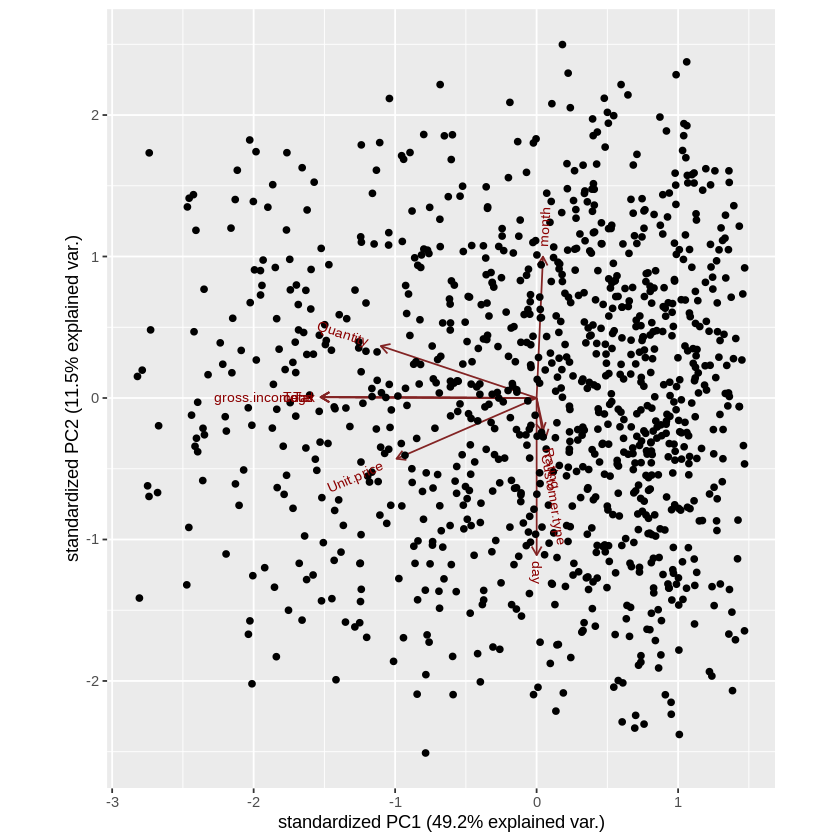

In [42]:
# Then Loading our ggbiplot library
 
library(ggbiplot)
ggbiplot(df.pca)

# Feature Selection

In [34]:
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

In [35]:
#finding the correlation matrix
correlationMatrix <- cor(df)
correlationMatrix

Warning message in cor(df):
“the standard deviation is zero”


,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,year,month,day
Branch,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Customer.type,NA,1.000000000,NA,NA,-0.020237875,-0.01676271,-0.01967028,NA,-0.01967028,NA,-0.01967028,0.018888672,-0.01967028,NA,0.005972443,0.034124208
Gender,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Product.line,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Unit.price,NA,-0.020237875,NA,NA,1.000000000,0.01077756,0.63396209,NA,0.63396209,NA,0.63396209,-0.008777507,0.63396209,NA,-0.027387186,0.057020896
Quantity,NA,-0.016762706,NA,NA,0.010777564,1.00000000,0.70551019,NA,0.70551019,NA,0.70551019,-0.015814905,0.70551019,NA,-0.014524276,-0.043346859
Tax,NA,-0.019670283,NA,NA,0.633962089,0.70551019,1.00000000,NA,1.00000000,NA,1.00000000,-0.036441705,1.00000000,NA,-0.022301340,-0.002514770
Payment,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA
cogs,NA,-0.019670283,NA,NA,0.633962089,0.70551019,1.00000000,NA,1.00000000,NA,1.00000000,-0.036441705,1.00000000,NA,-0.022301340,-0.002514770
gross.margin.percentage,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA


In [36]:
# Find attributes that are highly correlated

highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes

highlyCorrelated

names(df[,highlyCorrelated])

[1]  7  9 11

[1] "Tax"          "cogs"         "gross.income"

In [45]:
#removing the variables with a higher correlation 


df1<- df[-highlyCorrelated]

In [46]:
# Performing our graphical comparison

par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df1), order = "hclust")

ERROR: ignored

# Association Rules

In [47]:
#installing the required arules library 

suppressWarnings(
        suppressMessages(if
                         (!require(arules, quietly=TRUE))
                install.packages("arules")))
library(arules)
install.packages("arulesViz")
library(arulesViz)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [48]:
df1 <- read.transactions("Supermarket_Sales_Dataset II.csv",sep=",")
df1

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [49]:
class(df1)

[1] "transactions"
attr(,"package")
[1] "arules"

In [50]:
# Previewing our first 5 transactions

inspect(df1[1:5])

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


In [51]:
# Generating a summary of the transaction dataset : information such as the most purchased items, 

summary(df1)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [52]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing some operation in percentage terms of the total transactions 

itemFrequency(df1[, 8:10],type = "absolute")
round(itemFrequency(df1[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
        107          69          86

black tea blueberries  body spray 
       1.43        0.92        1.15

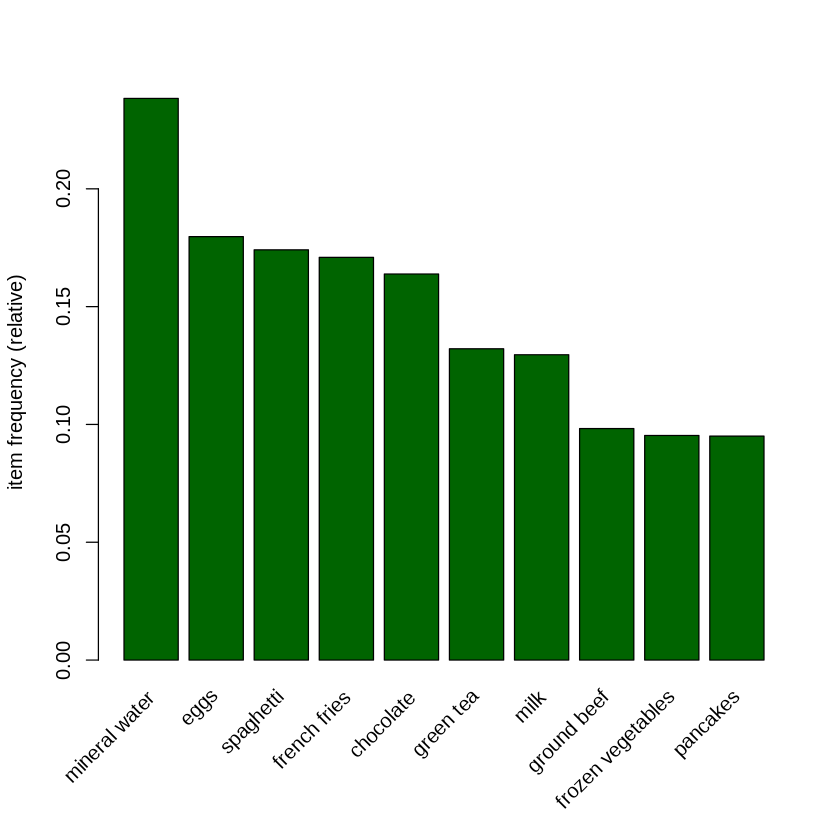

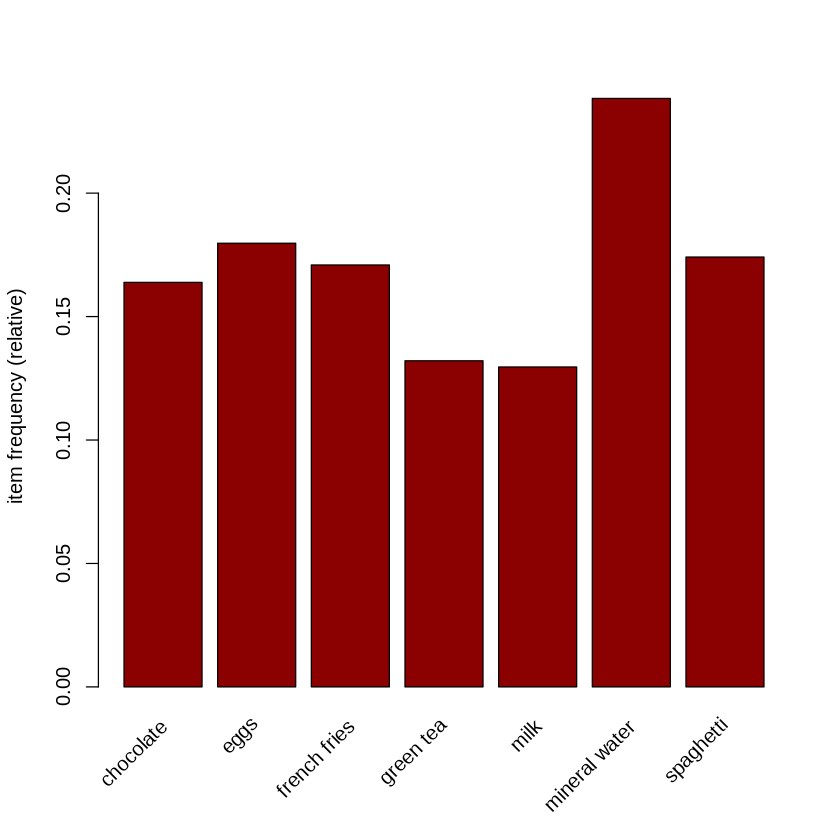

In [53]:
# plot the frequency of items
itemFrequencyPlot(df1, topN = 10,col="darkgreen")
itemFrequencyPlot(df1, support = 0.1,col="darkred")

In [54]:
rules <- apriori (df1, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [55]:
# Building a apriori model with Min Support as 0.001 and confidence as 0.7.
rules2 <- apriori (df1,parameter = list(supp = 0.001, conf = 0.7))
rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [200 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 200 rules 

In [56]:
#exploring our model through the use of the summary function as shown
summary(rules)

#most rules have 3 and 4 items though some rules do have upto 6.

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
 data ntransactions support confidence
  df1          7501   0.001        0.8
                                                        

In [57]:
# Observing rules built in our model i.e. first 5 model rules

inspect(rules[1:5])

    lhs                              rhs             support     confidence
[1] {frozen smoothie, spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon, pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk, turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef, nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce, pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [58]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.

rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                        rhs                 support confidence    coverage      lift count
[1] {french fries,                                                                               
     mushroom cream sauce,                                                                       
     pasta}                 => {escalope}      0.001066524       1.00 0.001066524 12.606723     8
[2] {ground beef,                                                                                
     light cream,                                                                                
     olive oil}             => {mineral water} 0.001199840       1.00 0.001199840  4.195190     9
[3] {cake,                                                                                       
     meatballs,                                                                                  
     mineral water}         => {milk}          0.001066524       1.00 0.001066524  7.717078     8
[4] {cake,          

In [59]:
# If we were ti make a promotion relating to the sale of say: cake, 
# we create a subset of rules concerning these products 
# This would tell us the items that the customers bought before purchasing yogurt

mineralwater <- subset(rules, subset = rhs %pin% "mineral water")
 
# Then order by confidence
mineralwater<-sort(mineralwater, by="confidence", decreasing=TRUE)
inspect(mineralwater[1:5])

    lhs                     rhs                 support confidence    coverage     lift count
[1] {ground beef,                                                                            
     light cream,                                                                            
     olive oil}          => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2] {cake,                                                                                   
     olive oil,                                                                              
     shrimp}             => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[3] {red wine,                                                                               
     soup}               => {mineral water} 0.001866418  0.9333333 0.001999733 3.915511    14
[4] {ground beef,                                                                            
     pancakes,                                              

In [60]:
#we can also determine items what customers might buy who have previously bought an item , in this case: mineral water?
# Subset the rules
mineralwater <- subset(rules, subset = lhs %pin% "mineral water")

# Order by confidence
mineralwater<-sort(mineralwater, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(mineralwater[1:5])

    lhs                                     rhs           support    
[1] {cake, meatballs, mineral water}     => {milk}        0.001066524
[2] {eggs, mineral water, pasta}         => {shrimp}      0.001333156
[3] {herb & pepper, mineral water, rice} => {ground beef} 0.001333156
[4] {light cream, mineral water, shrimp} => {spaghetti}   0.001066524
[5] {grated cheese, mineral water, rice} => {ground beef} 0.001066524
    confidence coverage    lift      count
[1] 1.0000000  0.001066524  7.717078  8   
[2] 0.9090909  0.001466471 12.722185 10   
[3] 0.9090909  0.001466471  9.252498 10   
[4] 0.8888889  0.001199840  5.105326  8   
[5] 0.8888889  0.001199840  9.046887  8   


# Anomaly Detection

In [61]:
# Installing anomalize package

install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘furrr’, ‘warp’, ‘BH’, ‘fracdiff’, ‘tseries’, ‘urca’, ‘rsample’, ‘padr’, ‘xts’, ‘slider’, ‘anytime’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [64]:
library(anomalize)

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [65]:
# Collect our time series data

tidyverse_cran_downloads

date,count,package
<date>,<dbl>,<chr>
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr
2017-01-07,1439,tidyr
2017-01-08,1556,tidyr
2017-01-09,3678,tidyr


In [67]:
data2 <- read_csv("/content/Supermarket_Sales_Forecasting - Sales.csv")
head(data2)

Rows: 1000 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): Sales


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [68]:
# Check the data types of the 2 columns
sapply(data2, class)

Date       Sales 
"character"   "numeric"

In [69]:
#Convertion to POCIXct type
data2$Date <- as.POSIXct(data2$Date)

ERROR: ignored

In [70]:
#Converting the data frame to tibble
#
df2 <- as_tibble(data2)
head(df2)

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [71]:
suppressWarnings(
        suppressMessages(if
                         (!require(tibble, quietly=TRUE))
                install.packages("tibble")))
library(tibble)

suppressWarnings(
        suppressMessages(if
                         (!require(tibbletime, quietly=TRUE))
                install.packages("tibbletime")))

library(tibbletime)

In [72]:
install.packages("dplyr")
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [73]:
#setting date as index for ease in anormaly detection and visualiation
df2 <- df2 %>%
                    tibbletime::as_tbl_time(index = Date)

ERROR: ignored

In [74]:
#Detecting our anomalies
# plot_anomalies() - 
# we now plot using plot_anomaly_decomposition() to visualize out data.
df2 %>%
  time_decompose(Sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>% 
  plot_anomaly_decomposition()

ERROR: ignored